## EXPLORATION DATASET GOOGLE

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")

In [136]:
# Chargement du dataset
df = pd.read_csv('../data/go_emotions_dataset.csv')

print("Informations générales du dataset:")
print(f"Forme du dataset: {df.shape}")
print(f"Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nPremières lignes:")
df.head()

Informations générales du dataset:
Forme du dataset: (211225, 31)
Taille mémoire: 83.64 MB

Premières lignes:


,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [137]:
# Analyse de la structure des données
print("Types de données:")
print(df.dtypes)
print("\nValeurs manquantes:")
print(df.isnull().sum().sum())

# Identification des colonnes d'émotions
emotion_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear']]
print(f"\nNombre de catégories d'émotions: {len(emotion_cols)}")
print("Catégories d'émotions:", emotion_cols)

Types de données:
id                      object
text                    object
example_very_unclear      bool
admiration               int64
amusement                int64
anger                    int64
annoyance                int64
approval                 int64
caring                   int64
confusion                int64
curiosity                int64
desire                   int64
disappointment           int64
disapproval              int64
disgust                  int64
embarrassment            int64
excitement               int64
fear                     int64
gratitude                int64
grief                    int64
joy                      int64
love                     int64
nervousness              int64
optimism                 int64
pride                    int64
realization              int64
relief                   int64
remorse                  int64
sadness                  int64
surprise                 int64
neutral                  int64
dtype: object

Valeur

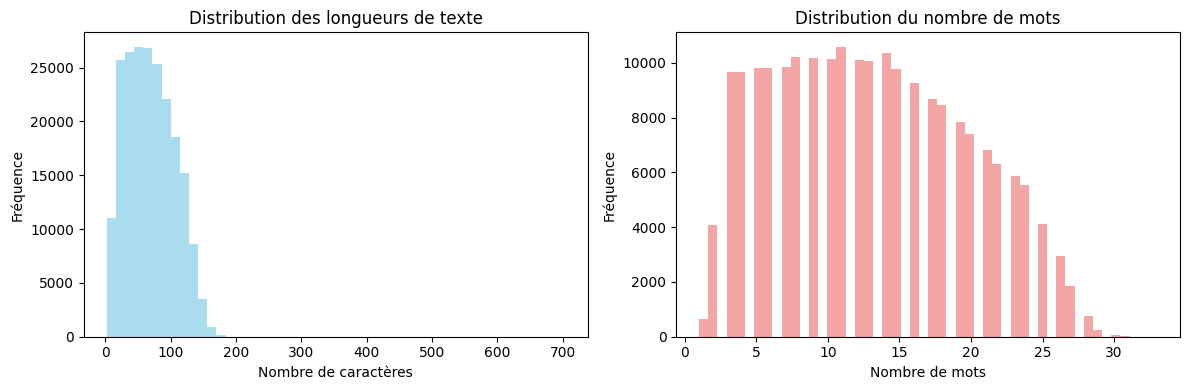

In [138]:
# Analyse des textes
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

# Distribution des longueurs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution des longueurs de texte')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
plt.hist(df['word_count'], bins=50, alpha=0.7, color='lightcoral')
plt.title('Distribution du nombre de mots')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

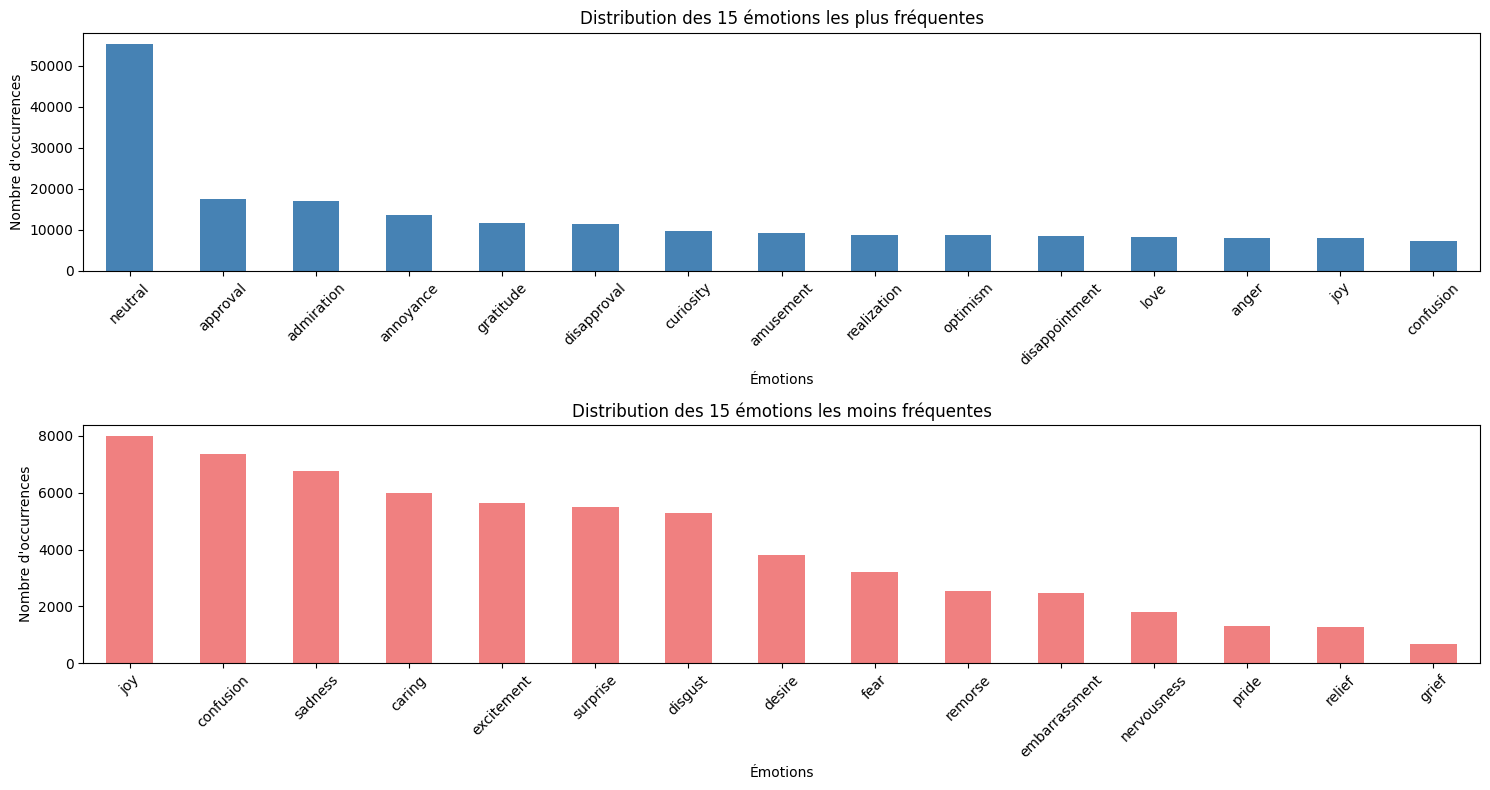

In [139]:
# Analyse de la distribution des émotions
emotion_counts = df[emotion_cols].sum().sort_values(ascending=False)

# Visualisation de la distribution
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
emotion_counts.head(15).plot(kind='bar', color='steelblue')
plt.title('Distribution des 15 émotions les plus fréquentes')
plt.xlabel('Émotions')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
emotion_counts.tail(15).plot(kind='bar', color='lightcoral')
plt.title('Distribution des 15 émotions les moins fréquentes')
plt.xlabel('Émotions')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

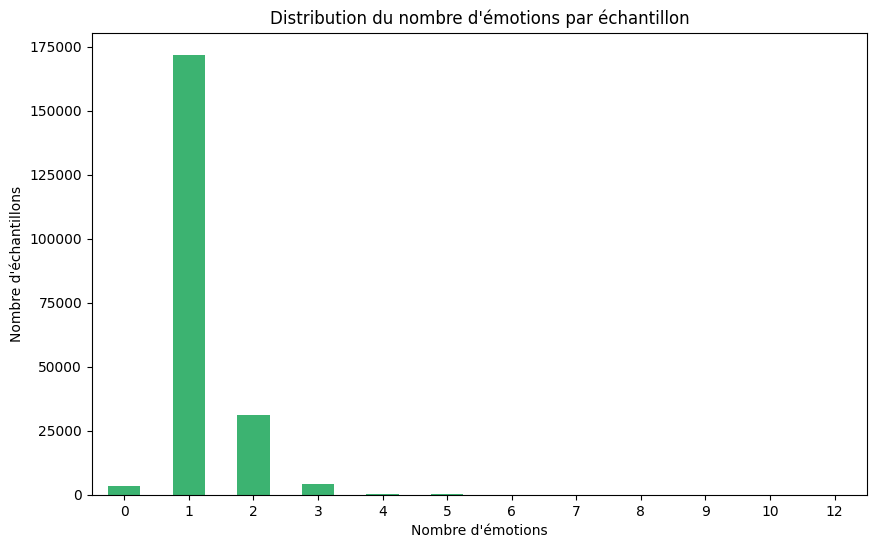

In [140]:
# Analyse des échantillons multi-étiquettes
df['emotion_count'] = df[emotion_cols].sum(axis=1)
emotion_distribution = df['emotion_count'].value_counts().sort_index()

# Visualisation
plt.figure(figsize=(10, 6))
emotion_distribution.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution du nombre d\'émotions par échantillon')
plt.xlabel('Nombre d\'émotions')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=0)
plt.show()

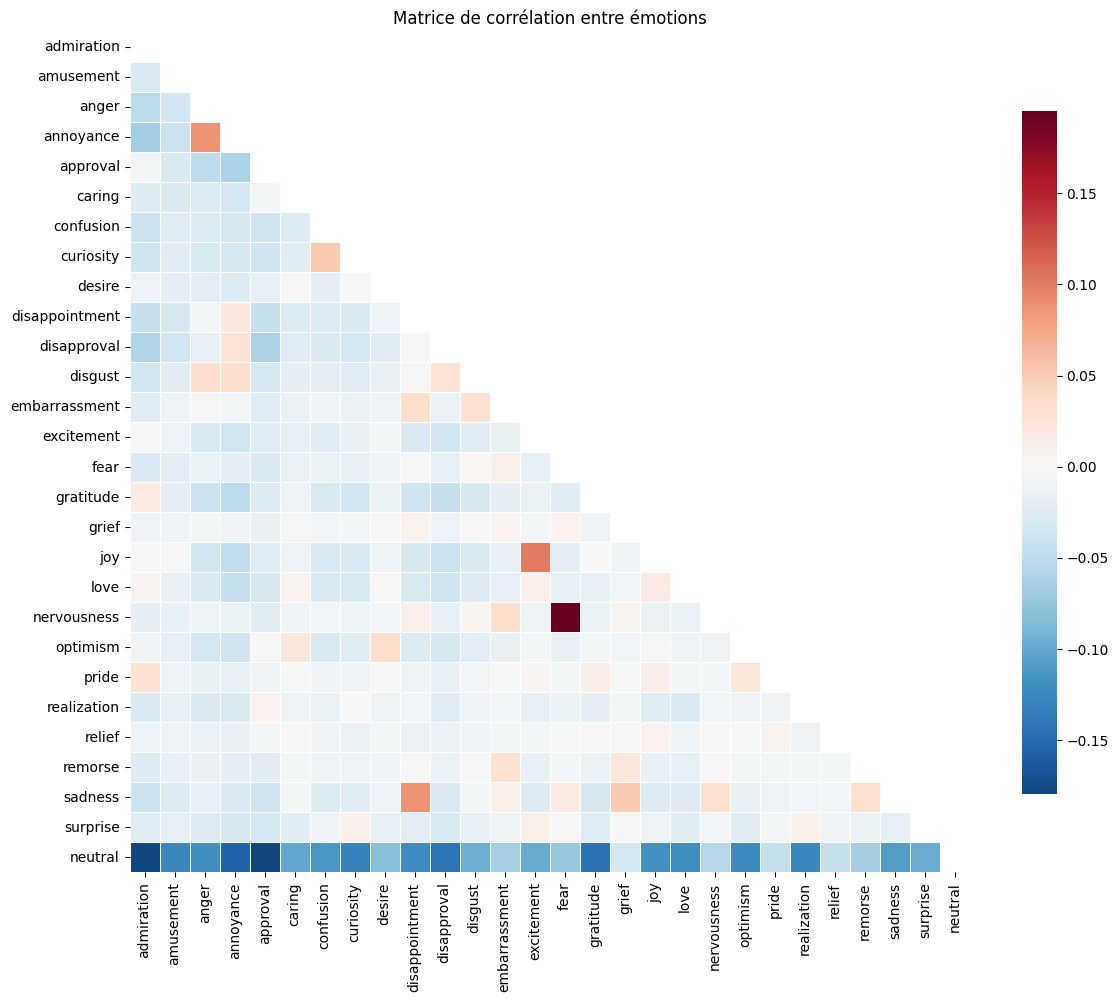

In [141]:
# Matrice de corrélation entre émotions
correlation_matrix = df[emotion_cols].corr()

# Calcul des corrélations pour usage ultérieur
corr_pairs = []
for i in range(len(emotion_cols)):
    for j in range(i+1, len(emotion_cols)):
        corr_pairs.append((emotion_cols[i], emotion_cols[j], correlation_matrix.iloc[i, j]))

corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation entre émotions')
plt.tight_layout()
plt.show()

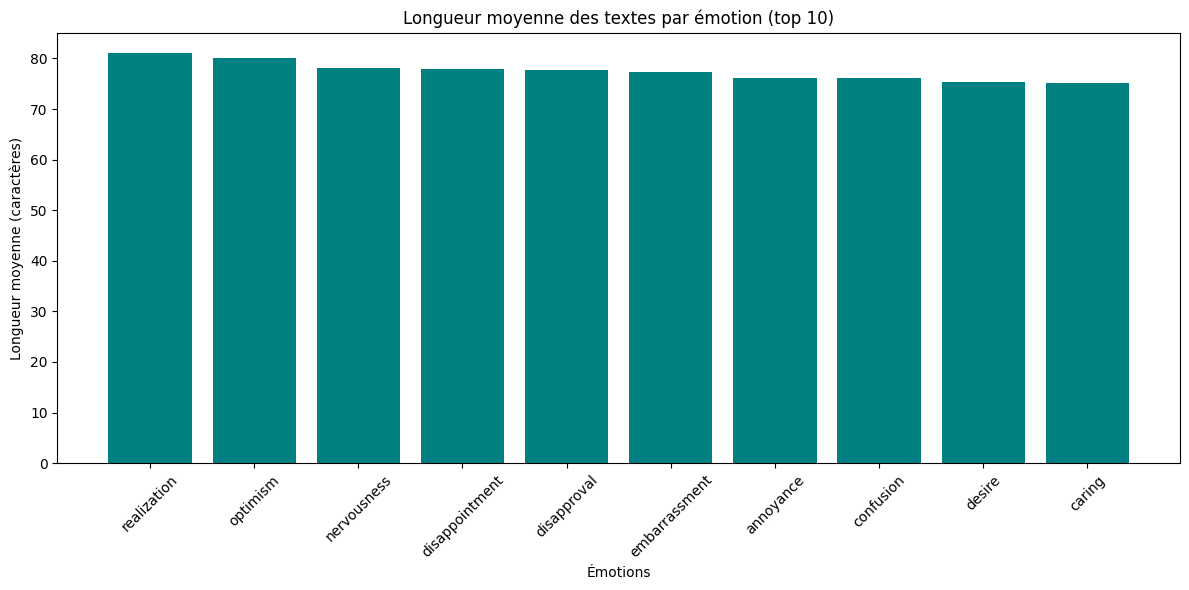

In [143]:
# Analyse de la longueur des textes par émotion
emotion_length_stats = []
for emotion in emotion_cols:
    texts_with_emotion = df[df[emotion] == 1]['text_length']
    if len(texts_with_emotion) > 0:
        emotion_length_stats.append({
            'emotion': emotion,
            'count': len(texts_with_emotion),
            'mean_length': texts_with_emotion.mean()
        })

length_stats_df = pd.DataFrame(emotion_length_stats)
length_stats_df = length_stats_df.sort_values('mean_length', ascending=False)

# Visualisation
plt.figure(figsize=(12, 6))
top_emotions_length = length_stats_df.head(10)
plt.bar(range(len(top_emotions_length)), top_emotions_length['mean_length'], color='teal')
plt.xlabel('Émotions')
plt.ylabel('Longueur moyenne (caractères)')
plt.title('Longueur moyenne des textes par émotion (top 10)')
plt.xticks(range(len(top_emotions_length)), top_emotions_length['emotion'], rotation=45)
plt.tight_layout()
plt.show()

In [144]:
# Résumé du dataset d'émotions
print(f"Dataset: {len(df):,} échantillons, {len(emotion_cols)} émotions")
print(f"Multi-étiquettes: {len(df[df['emotion_count'] > 1]):,} échantillons ({len(df[df['emotion_count'] > 1])/len(df)*100:.1f}%)")
print(f"Émotion dominante: {emotion_counts.index[0]} ({emotion_counts.iloc[0]:,} occurrences)")

Dataset: 211,225 échantillons, 28 émotions
Multi-étiquettes: 35,994 échantillons (17.0%)
Émotion dominante: neutral (55,298 occurrences)


## EXPLORATION DATASET REVIEWS

In [145]:
# Chargement du dataset parquet
import pyarrow.parquet as pq

parquet_file = '../data/raw/Clothing_Shoes_and_Jewelry.parquet.chunk_0000.parquet'
reviews_df = pd.read_parquet(parquet_file)

print("Informations générales du dataset reviews:")
print(f"Forme du dataset: {reviews_df.shape}")
print(f"Taille mémoire: {reviews_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColonnes disponibles: {list(reviews_df.columns)}")
print(f"\nTypes de données:")
print(reviews_df.dtypes)

Informations générales du dataset reviews:
Forme du dataset: (200000, 10)
Taille mémoire: 151.33 MB

Colonnes disponibles: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']

Types de données:
rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object
Taille mémoire: 151.33 MB

Colonnes disponibles: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']

Types de données:
rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vo

In [146]:
# Analyse de la structure et qualité des données
missing_data = reviews_df.isnull().sum()
missing_percentage = (missing_data / len(reviews_df)) * 100
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing_data,
    'Pourcentage': missing_percentage
}).sort_values('Pourcentage', ascending=False)

print("Colonnes avec valeurs manquantes:")
print(missing_df[missing_df['Valeurs manquantes'] > 0])

reviews_df.head(3)

Colonnes avec valeurs manquantes:
Empty DataFrame
Columns: [Valeurs manquantes, Pourcentage]
Index: []


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,3.0,Arrived Damaged : liquid in hub locker!,"Unfortunately Amazon in their wisdom (cough, c...","[{'attachment_type': 'IMAGE', 'large_image_url...",B096S6LZV4,B09NSZ5QMF,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677938767351,0,True
1,3.0,Useless under 40 degrees.,Useless under 40 degrees unless you’re just ru...,[],B09KMDBDCN,B08NGL3X17,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677083819242,0,False
2,4.0,"Not waterproof, but a very comfy shoe.",I purchased these bc they are supposed to be w...,[],B096N5WK8Q,B07RGM3DYC,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1675524098918,11,True


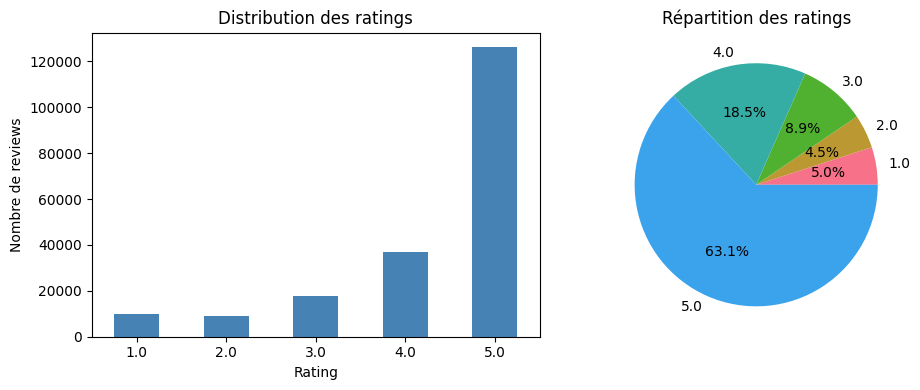

In [147]:
# Analyse des ratings
if 'rating' in reviews_df.columns:
    rating_counts = reviews_df['rating'].value_counts().sort_index()
    
    # Visualisation des ratings
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    rating_counts.plot(kind='bar', color='steelblue')
    plt.title('Distribution des ratings')
    plt.xlabel('Rating')
    plt.ylabel('Nombre de reviews')
    plt.xticks(rotation=0)
    
    plt.subplot(1, 2, 2)
    plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
    plt.title('Répartition des ratings')
    plt.tight_layout()
    plt.show()
else:
    print("Colonne 'rating' non trouvée")

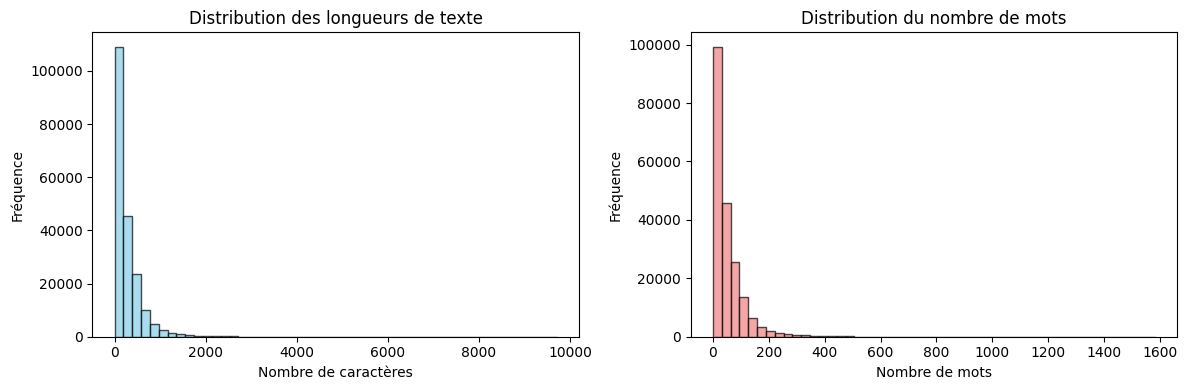

In [148]:
# Analyse du contenu textuel
text_column = None
for col in ['text', 'review_text', 'review', 'content']:
    if col in reviews_df.columns:
        text_column = col
        break

if text_column:
    reviews_df['text_length'] = reviews_df[text_column].str.len()
    reviews_df['word_count'] = reviews_df[text_column].str.split().str.len()
    
    # Distribution des longueurs
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(reviews_df['text_length'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution des longueurs de texte')
    plt.xlabel('Nombre de caractères')
    plt.ylabel('Fréquence')
    
    plt.subplot(1, 2, 2)
    plt.hist(reviews_df['word_count'].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.title('Distribution du nombre de mots')
    plt.xlabel('Nombre de mots')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()
else:
    print("Aucune colonne de texte identifiée")

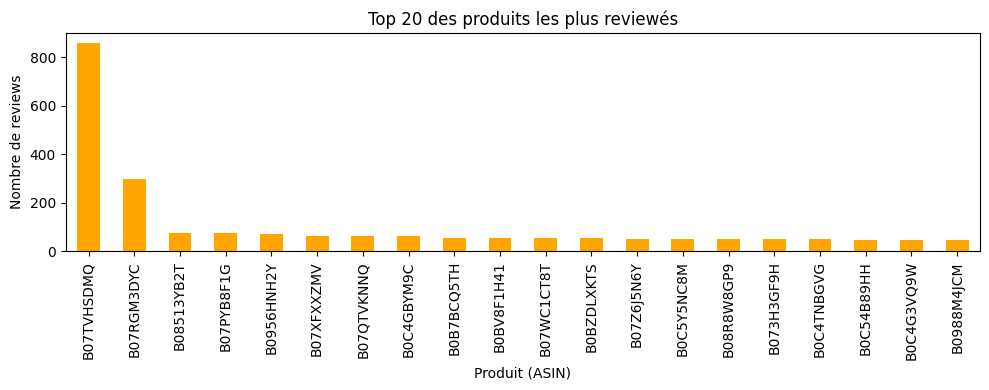

In [149]:
# Analyse temporelle et des produits
if 'timestamp' in reviews_df.columns:
    try:
        valid_timestamps = (reviews_df['timestamp'] >= 0) & (reviews_df['timestamp'] <= 1893456000)
        reviews_df_valid = reviews_df[valid_timestamps].copy()
        
        if len(reviews_df_valid) > 0:
            reviews_df_valid['year'] = pd.to_datetime(reviews_df_valid['timestamp'], unit='s', errors='coerce').dt.year
            yearly_counts = reviews_df_valid['year'].value_counts().sort_index()
            
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            yearly_counts.plot(kind='line', marker='o', color='darkgreen')
            plt.title('Évolution du nombre de reviews par année')
            plt.xlabel('Année')
            plt.ylabel('Nombre de reviews')
            plt.grid(True, alpha=0.3)
            
            plt.subplot(1, 2, 2)
            yearly_counts.tail(10).plot(kind='bar', color='darkblue')
            plt.title('Reviews des 10 dernières années')
            plt.xlabel('Année')
            plt.ylabel('Nombre de reviews')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            reviews_df.loc[valid_timestamps, 'year'] = reviews_df_valid['year']
    except Exception as e:
        print(f"Erreur temporelle: {e}")

# Analyse des produits
if 'parent_asin' in reviews_df.columns:
    product_counts = reviews_df['parent_asin'].value_counts()
    
    plt.figure(figsize=(10, 4))
    product_counts.head(20).plot(kind='bar', color='orange')
    plt.title('Top 20 des produits les plus reviewés')
    plt.xlabel('Produit (ASIN)')
    plt.ylabel('Nombre de reviews')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

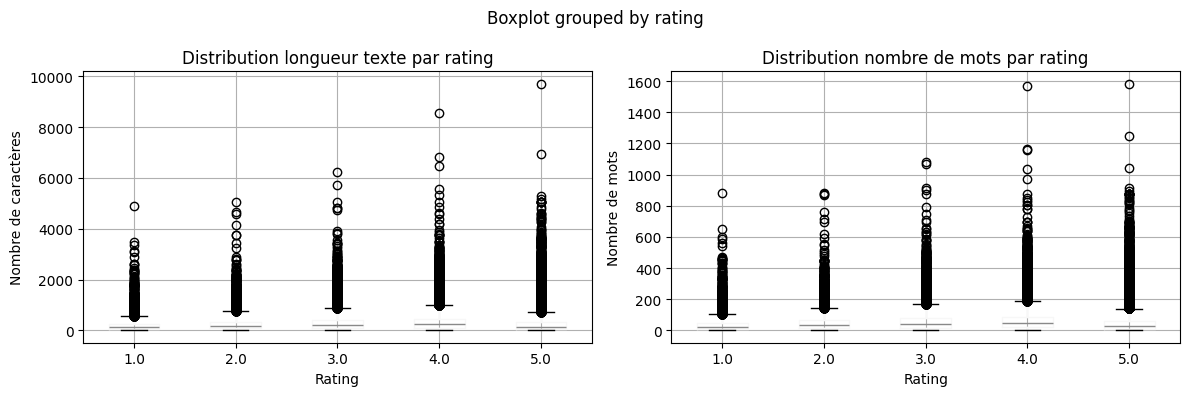

In [150]:
# Analyse de la relation entre rating et longueur des textes
if 'rating' in reviews_df.columns and text_column:
    # Visualisation
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    reviews_df.boxplot(column='text_length', by='rating', ax=plt.gca())
    plt.title('Distribution longueur texte par rating')
    plt.xlabel('Rating')
    plt.ylabel('Nombre de caractères')
    
    plt.subplot(1, 2, 2)
    reviews_df.boxplot(column='word_count', by='rating', ax=plt.gca())
    plt.title('Distribution nombre de mots par rating')
    plt.xlabel('Rating')
    plt.ylabel('Nombre de mots')
    plt.tight_layout()
    plt.show()

In [151]:
# Résumé du dataset reviews
print(f"Reviews: {len(reviews_df):,} échantillons")
if 'rating' in reviews_df.columns:
    print(f"Rating moyen: {reviews_df['rating'].mean():.2f}")
if text_column:
    print(f"Longueur moyenne: {reviews_df['text_length'].mean():.0f} caractères")
if 'parent_asin' in reviews_df.columns:
    print(f"Produits uniques: {reviews_df['parent_asin'].nunique():,}")

Reviews: 200,000 échantillons
Rating moyen: 4.30
Longueur moyenne: 268 caractères
Produits uniques: 137,566
